# Examen Metodos de Analisis estadistico II  Luis Gómez M

Entre mis actividades en el Hospital Salvador está el realizar Ecografias oftalmologicas, habitualmente escribía mis informes a mano alzada en el mismo documento donde imprimia las fotografias, sin embargo los colegas me reclamaron por mi mala letra asi es que hace seis meses decidí imprimir mis informes a partir de archivos .txt que escribo en el bloc de notas y luego los imprimo  y los guardo.   

Hipótesis:  Mediante metodos de PLN se puede determinar si un informe ecográfico corresponde a una ecografia normal o patológica.  Considerando que los informes no contienen diagnóstico alguno.

La impresión empírica es que los informes normales contienen una menor variedad de tokens.
Suelen ser muy parecidos entre si, a diferencia de los informes patológicos que son más variados.


las ventajas de este dataset es que conozco muy bien los datos involucrados y como se generan y la desventaja es que tiene poca longitud y eso no permite sacar buenas conclusiones.

Voy a realizar el mejor preprocesamiento de los datos posible, luego voy a intentar usar el metodo de extraccion de caracteristicas TF-IDF y luego el metodo de clasificacion Naive-Bayes los cuales me parecen los mas adecuados tomando en cuenta mi hipotesis.

# Preprocesamiento

Para comenzar se importan las librerias necesarias.

In [3]:
import datasets # Biblioteca de manejo de conjuntos de datos para procesamiento de lenguaje natural
import es_core_news_sm # Modelo Spacy de procesamiento de lenguaje natural en español
import spacy # Biblioteca de procesamiento de lenguaje natural
import pandas as pd # Biblioteca de manejo de conjuntos de datos
import re # Módulo de expresiones regulares
import tokenizers # Biblioteca de tokenización de texto
import nltk # Biblioteca de procesamiento de lenguaje natural
import wordcloud

In [5]:
ecotrain = datasets.load_dataset('csv', data_files='C:\\Users\\lalog_000\\Desktop\\MIM\\ecotrain.csv')

Using custom data configuration default-15701dc4757688e7


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Failed to read file 'C:\Users\lalog_000\Desktop\MIM\ecotrain.csv' with error <class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Expected 1 fields in line 114, saw 2



ParserError: Error tokenizing data. C error: Expected 1 fields in line 114, saw 2


Primer inconveniente, no logro usar las funciones de la biblioteca datasets al no poder solucionar el problema se opta por prescindir de este.   Se cargan los CSV ecotrain y ecotest

In [6]:
ecotrain= pd.read_csv("C:\\Users\\lalog_000\\Desktop\\MIM\\ecotrain.csv", sep=";")

In [7]:
ecotest = pd.read_csv("C:\\Users\\lalog_000\\Desktop\\MIM\\ecotest.csv", sep=";")

In [8]:
print(ecotrain)

    label                                              texto
0       1  Espacio vitreo con moderada celularidad.\n\t\t...
1       0  Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
2       1  Vitreo claro sin celularidad\n\t\t\tDVP (-)\n\...
3       1  Ojo vitrectomizado. remanentes vitreos en peri...
4       1  Ojo Vitrectomizado\n\tHemorragia vitrea modera...
..    ...                                                ...
85      0  Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
86      1  Hialosis Asteroidal\n\n\t\tDVP Parcial . Adher...
87      1  Ojo Vitrectomizado\n\tEspacio vitreo claro\t\n...
88      1  Ojo Vitrectomizado\n\tCamara Vitrea ocupada po...
89      0  Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...

[90 rows x 2 columns]


In [9]:
ecotrain.shape

(90, 2)

In [10]:
ecotest.shape

(32, 2)

Para comenzar se pasa el texto a minuscula

In [11]:
ecotrain_lower = ecotrain["texto"].str.lower()

In [12]:
print(ecotrain_lower)

0     espacio vitreo con moderada celularidad.\n\t\t...
1     vitreo claro\n\t\tdvp completo\n\t\tretina apl...
2     vitreo claro sin celularidad\n\t\t\tdvp (-)\n\...
3     ojo vitrectomizado. remanentes vitreos en peri...
4     ojo vitrectomizado\n\themorragia vitrea modera...
                            ...                        
85    vitreo claro\n\t\tdvp completo\n\t\tretina apl...
86    hialosis asteroidal\n\n\t\tdvp parcial . adher...
87    ojo vitrectomizado\n\tespacio vitreo claro\t\n...
88    ojo vitrectomizado\n\tcamara vitrea ocupada po...
89    vitreo claro\n\t\tdvp completo\n\t\tretina apl...
Name: texto, Length: 90, dtype: object


Se eliminan simbolos usando expresiones regulares

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [14]:

ecotrain_replace = ecotrain_lower.str.replace('[^A-Za-zñáéíóú]', " ", case = False, regex = True)

In [15]:
print(ecotrain_replace)

0     espacio vitreo con moderada celularidad       ...
1     vitreo claro   dvp completo   retina aplicada ...
2     vitreo claro sin celularidad    dvp        ret...
3     ojo vitrectomizado  remanentes vitreos en peri...
4     ojo vitrectomizado  hemorragia vitrea moderada...
                            ...                        
85    vitreo claro   dvp completo   retina aplicada ...
86    hialosis asteroidal    dvp parcial   adherenci...
87    ojo vitrectomizado  espacio vitreo claro   ret...
88    ojo vitrectomizado  camara vitrea ocupada por ...
89    vitreo claro   dvp completo   retina aplicada ...
Name: texto, Length: 90, dtype: object


se eliminan los tildes

In [16]:
x = ecotrain_replace.str.replace('á', "a")
x = x.str.replace('é', "e")
x = x.str.replace('í', "i")
x = x.str.replace('ó', "o")
ecotrain_normalizadas = x.str.replace('ú', "u")

In [17]:
print(ecotrain_normalizadas)

0     espacio vitreo con moderada celularidad       ...
1     vitreo claro   dvp completo   retina aplicada ...
2     vitreo claro sin celularidad    dvp        ret...
3     ojo vitrectomizado  remanentes vitreos en peri...
4     ojo vitrectomizado  hemorragia vitrea moderada...
                            ...                        
85    vitreo claro   dvp completo   retina aplicada ...
86    hialosis asteroidal    dvp parcial   adherenci...
87    ojo vitrectomizado  espacio vitreo claro   ret...
88    ojo vitrectomizado  camara vitrea ocupada por ...
89    vitreo claro   dvp completo   retina aplicada ...
Name: texto, Length: 90, dtype: object


In [18]:
tokenizer = tokenizers.Tokenizer(tokenizers.models.WordPiece())  ##Tampoco funciona biblioteca tokenizers🤗👎

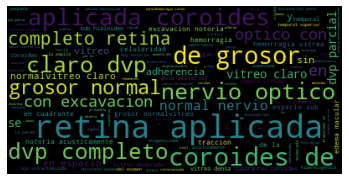

In [19]:
def sumar_lista(lista):
    suma=""
    for i in lista:
        suma += i
    return suma    
    
texto = sumar_lista(ecotrain_normalizadas) 

texto = " ".join(texto.split())

wordcloud = WordCloud().generate(texto)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
spacy_tokenizer = es_core_news_sm.load().tokenizer    ## usamos este método de la libreria spacy 

In [21]:
ecotrain_tokenizadas = ecotrain_normalizadas  

In [22]:
for i in range(0,90):
    ecotrain_tokenizadas[i] = list(spacy_tokenizer(ecotrain_tokenizadas[i])) ## generamos una tokenización para todos los datos

In [23]:
print(ecotrain_tokenizadas)

0     [espacio, vitreo, con, moderada, celularidad, ...
1     [vitreo, claro,   , dvp, completo,   , retina,...
2     [vitreo, claro, sin, celularidad,    , dvp,   ...
3     [ojo, vitrectomizado,  , remanentes, vitreos, ...
4     [ojo, vitrectomizado,  , hemorragia, vitrea, m...
                            ...                        
85    [vitreo, claro,   , dvp, completo,   , retina,...
86    [hialosis, asteroidal,    , dvp, parcial,   , ...
87    [ojo, vitrectomizado,  , espacio, vitreo, clar...
88    [ojo, vitrectomizado,  , camara, vitrea, ocupa...
89    [vitreo, claro,   , dvp, completo,   , retina,...
Name: texto, Length: 90, dtype: object


In [24]:
etiquetas = ecotrain["label"]
type(etiquetas)

pandas.core.series.Series

In [25]:
ecografias_normalizadas = ecotrain["texto"]
print(ecografias_normalizadas)

0     Espacio vitreo con moderada celularidad.\n\t\t...
1     Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
2     Vitreo claro sin celularidad\n\t\t\tDVP (-)\n\...
3     Ojo vitrectomizado. remanentes vitreos en peri...
4     Ojo Vitrectomizado\n\tHemorragia vitrea modera...
                            ...                        
85    Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
86    Hialosis Asteroidal\n\n\t\tDVP Parcial . Adher...
87    Ojo Vitrectomizado\n\tEspacio vitreo claro\t\n...
88    Ojo Vitrectomizado\n\tCamara Vitrea ocupada po...
89    Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
Name: texto, Length: 90, dtype: object


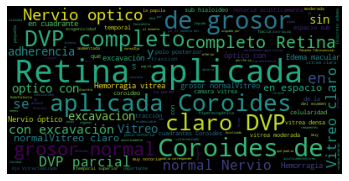

In [172]:
texto2 = sumar_lista(ecografias_normalizadas) 
wordcloud = WordCloud().generate(texto2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
etiquetados = pd.DataFrame()
etiquetados["etiquetas"] = etiquetas
etiquetados["texto"]= ecografias_normalizadas   ## reponemos las etiquetas

In [27]:
print(etiquetados)

    etiquetas                                              texto
0           1  Espacio vitreo con moderada celularidad.\n\t\t...
1           0  Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
2           1  Vitreo claro sin celularidad\n\t\t\tDVP (-)\n\...
3           1  Ojo vitrectomizado. remanentes vitreos en peri...
4           1  Ojo Vitrectomizado\n\tHemorragia vitrea modera...
..        ...                                                ...
85          0  Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...
86          1  Hialosis Asteroidal\n\n\t\tDVP Parcial . Adher...
87          1  Ojo Vitrectomizado\n\tEspacio vitreo claro\t\n...
88          1  Ojo Vitrectomizado\n\tCamara Vitrea ocupada po...
89          0  Vitreo claro\n\t\tDVP completo\n\t\tRetina apl...

[90 rows x 2 columns]


# Representacion de documentos

In [28]:
import sklearn.feature_extraction
import sklearn.naive_bayes
import sklearn.metrics
import sklearn.pipeline
import sklearn.model_selection
import numpy as np 
import spacy.lang.es               ## exportamos bibliotecas necesarias

In [29]:
stopwords = spacy.lang.es.stop_words.STOP_WORDS  ## Stop words, de la Biblioteca spaCy

In [30]:
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
    stop_words = stopwords,
    
)
## se ocupa un vectorizador basado en tf-idf , no se eliminan palabras

In [31]:
tfidf_vectorizer.fit(etiquetados["texto"])    ## el ajuste se realiza con los textos normalizados 

TfidfVectorizer(stop_words={'actualmente', 'acuerdo', 'adelante', 'ademas',
                            'además', 'adrede', 'afirmó', 'agregó', 'ahi',
                            'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas',
                            'alguno', 'algunos', 'algún', 'alli', 'allí',
                            'alrededor', 'ambos', 'ampleamos', 'antano',
                            'antaño', 'ante', 'anterior', 'antes', 'apenas',
                            'aproximadamente', ...})

In [32]:
feature_names = list({k: v for k, v in sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda item: item[1])}.keys())

In [33]:
print(feature_names)

['10', '11', '12', '37', '4mm', 'abundante', 'aceite', 'acumulación', 'acustica', 'acusticamenta', 'acusticamente', 'acústica', 'acústicamente', 'adelgazadas', 'adelgazamientoi', 'adherencia', 'adherenciaen', 'adherencias', 'adherido', 'adjunta', 'alta', 'altamente', 'altura', 'antigua', 'aplicada', 'aprox', 'aspecto', 'asteroidal', 'aumentada', 'axial', 'base', 'cabeza', 'calculo', 'camara', 'cambios', 'casos', 'cavidad', 'ceio', 'celularidad', 'clara', 'claridad', 'claros', 'coagulo', 'colapso', 'coleccion', 'compatible', 'completa', 'completo', 'constata', 'contacto', 'continuidad', 'contrtol', 'corioides', 'coroidea', 'coroideo', 'coroideos', 'coroides', 'coroiditis', 'corresponde', 'corresponder', 'crece', 'crónico', 'cuadrante', 'cuadrantes', 'cuadrantre', 'cuadro', 'cuantia', 'cuantificarla', 'cuantía', 'cudrantes', 'cuerpociliar', 'cuerpos', 'cámara', 'delgada', 'densa', 'desgarro', 'desprendimiento', 'desprendimientos', 'detalles', 'determina', 'determinar', 'dificil', 'difusa

In [35]:
type(feature_names)

list

In [38]:
vectorizado_train = tfidf_vectorizer.transform(ecotrain["texto"])
vectorizado_test = tfidf_vectorizer.transform(ecotest["texto"])         ## se vectoriza con la funcion transform el grupo de train y de test

In [39]:
vectorizado_train.shape


(90, 272)

In [40]:
print(tfidf_vectorizer)



TfidfVectorizer(stop_words={'actualmente', 'acuerdo', 'adelante', 'ademas',
                            'además', 'adrede', 'afirmó', 'agregó', 'ahi',
                            'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas',
                            'alguno', 'algunos', 'algún', 'alli', 'allí',
                            'alrededor', 'ambos', 'ampleamos', 'antano',
                            'antaño', 'ante', 'anterior', 'antes', 'apenas',
                            'aproximadamente', ...})


# Naive Bayes

In [41]:
clasificador = sklearn.naive_bayes.MultinomialNB()
clasificador.fit(vectorizado_train,ecotrain["label"])   ##instanciar funcion y realizar ajustes

MultinomialNB()

In [42]:
log_probability = pd.DataFrame(clasificador.feature_log_prob_.T, index = feature_names)   ## comparamos palabras mas importantes

In [43]:
log_probability.sort_values(1,ascending=False)  ## hemorragia vitrea es típicamente patológico

,0,1
hemorragia,-5.906786,-4.356034
nervio,-4.994752,-4.402148
vitrea,-5.533888,-4.428501
retina,-3.827331,-4.436741
aplicada,-3.808796,-4.468490
...,...,...
od,-5.588591,-6.201457
obstante,-5.588591,-6.201457
excavada,-5.588591,-6.201457
cuantificarla,-5.292493,-6.201457


In [44]:
log_probability.sort_values(0,ascending=False)

,0,1
vitreo,-3.535176,-4.742007
completo,-3.545729,-4.936084
dvp,-3.610115,-4.711505
grosor,-3.623861,-4.613727
normal,-3.636688,-4.472261
...,...,...
espacio,-5.906786,-4.607942
especialmente,-5.906786,-5.781657
estafilomas,-5.906786,-6.000965
estructura,-5.906786,-5.981267


In [45]:
print(sklearn.metrics.classification_report(
    ecotest["label"],
    clasificador.predict(vectorizado_test)   ## evaluamos el clasificador con el grupo de test
))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.86      0.75      0.80        16

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = clasificador.predict_proba(vectorizado_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(ecotest["label"], lr_probs)

In [51]:
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc))

Naive Bayes: ROC AUC=0.945


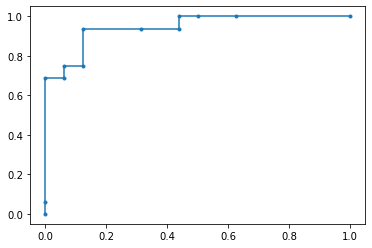

In [53]:
from matplotlib import pyplot

lr_fpr, lr_tpr, _ = roc_curve(ecotest["label"], lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')

In [46]:
from sklearn.ensemble import RandomForestClassifier 
clasificador_RF = RandomForestClassifier(max_depth = 2,random_state =0)

clasificador_RF.fit(vectorizado_train,ecotrain["label"])

RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
print(sklearn.metrics.classification_report(
    ecotest["label"],
    clasificador_RF.predict(vectorizado_test)   ## evaluamos el clasificador con el grupo de test
))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.87      0.81      0.84        16

    accuracy                           0.84        32
   macro avg       0.85      0.84      0.84        32
weighted avg       0.85      0.84      0.84        32



In [54]:
lr_probs_RF = clasificador_RF.predict_proba(vectorizado_test)
lr_probs_RF = lr_probs_RF[:, 1]
lr_auc_RF = roc_auc_score(ecotest["label"], lr_probs_RF)

In [55]:
print('Naive Bayes: ROC AUC=%.3f' % (lr_auc_RF))

Naive Bayes: ROC AUC=0.902


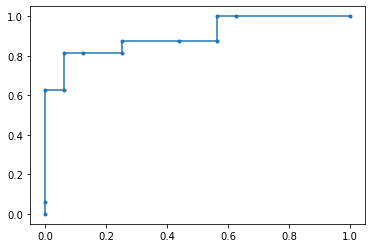

In [56]:
lr_fpr, lr_tpr, _ = roc_curve(ecotest["label"], lr_probs_RF)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')

# Conclusion

 Los resultados del clasificador muestran que se puede determinar aproximadamente si una ecografia es normal o patológica segun las caracteristicas del texto contenido en su informe, la metrica no resulta muy buena pero eso se puede deber a que la muestra es pequeña, seria interesante repetir el experimento con un número mayor de muestras.